# 第六讲：凸函数（convex functions）
___

## 1. 函数的凹凸性

假设函数$f(x)$在区间$I$上有定义，若$\forall x_1, x_2 \in I, \forall t \in [0,1]$，如果
$$
tf(x_1) + (1-t)f(x_2) \geq f(tx_1 + (1-t)x_2)
$$
则称$f(x)$为$I$上的__凸函数__。如果$x_1 \neq x_2$，以上不等式严格成立，则称$f(x)$为$I$上的__严格凸函数__。

相反如果
$$
tf(x_1) + (1-t)f(x_2) \leq f(tx_1 + (1-t)x_2)
$$
则称$f(x)$为$I$上的__凹函数__。如果$x_1 \neq x_2$，以上不等式严格成立，则称$f(x)$为$I$上的__严格凹函数__。

如果函数值的凸组合（convex combination）恒大于定义量的凸组合的函数值，则为凸函数，在几何上来看，对于下面的一维函数：
$$
f(x) = x^2 - 3x - 4
$$

In [1]:
def f(x):
    return x**2 - 3*x - 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

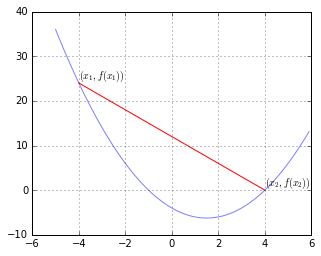

In [9]:
x = np.arange(-5, 6, 0.1)
y = f(x)
plt.figure(figsize=(5,4))
plt.plot(x, y, 'b-', alpha=0.5)
plt.plot([-4, 4], [f(-4), f(4)], 'r-')
plt.text(-4, f(-4)+1, r'$(x_1, f(x_1))$')
plt.text(4, f(4)+1, r'$(x_2, f(x_2))$')
plt.grid(True)

所以，一种非常形而上的感觉，凸函数的几何意义就是函数曲线上两点的连线在函数曲线的上方。

我们还发现，凸函数围成的内部，任意两点之间的连线都在这个集合的内部，也就是说，这是一个凸集，right？

这就是__上境图（epigraph）__的概念，凸函数的上境图是一个凸集，如果某函数的上境图是一个凸集，那么该函数也就是一个凸函数。

所以上境图为凸集是凸函数的充要条件，是不是？

<font color='red'>$\S$ 脑洞大开一下，是否存在既不是凸函数也不是凹函数的函数？是否存在既是凸函数，又是凹函数的函数呢？</font>

### $\S$定理1

假设函数$f(x)$的定义域为$[a,b]$且在$(a,b)$上可导，则$f(x)$为凸函数的充要条件是$f'(x)$在$(a,b)$上单调递增，也就是说$f''(x)$非负；而$f(x)$为严格凸函数的充要条件是$f'(x)$在$(a,b)$上严格单调递增，也就是说$f''(x)$非负且$f''(x)$不恒为0。

### $\S$定理2
设$f(x)$是区间$[a,b]$上的凸函数，则对于$\forall x_1, \ldots, x_n \in [a,b]$，$\sum_{i=1}^n t_i =1$且$t \in [0,1]$，恒有
$$
\sum_{i=1}^n t_i f(x_i) \ge f\left(\sum_{i=1}^n t_i x_i\right)
$$
并且当$f(x)$为严格凸，且$x_i$不全相同时，不等式严格成立。

### <font color='blue'>$\S$证明题</font>

证明:
$$
\min\{a_1, a_2, \ldots, a_n\} < \frac{n}{\frac{1}{a_1}+\frac{1}{a_2}+\ldots+\frac{1}{a_n}} < \sqrt[n]{a_1a_2 \cdots a_n} < \frac{a_1+a_2+\ldots+a_n}{n} < \max\{a_1, a_2, \ldots, a_n\}
$$

前后都不难证明：
$$
\begin{align}
\frac{n}{\frac{1}{a_1}+\frac{1}{a_2}+\ldots+\frac{1}{a_n}} > \frac{n}{\frac{n}{\min\{a_1,\ldots,a_n\}}} = \min\{a_1,\ldots,a_n\}\\
\frac{a_1+a_2+\ldots+a_n}{n} < \frac{n \max\{a_1,\ldots,a_n\}}{n} = \max\{a_1,\ldots,a_n\}
\end{align}
$$
关键是调和平均数、几何平均数、代数平均数的关系的证明:

构造一个函数
$$
f(x) = \left\{
\begin{array}{ll}
\left( \frac{a_1^x + \ldots + a_n^x}{n}\right)^{1/x}, & x \neq 0\\
\sqrt[n]{a_1a_2 \cdots a_n}, & x=0
\end{array}
\right.
$$

当$x=1$时$f(x)$为算数平均数，当$x=-1$时为调和平均数，当$x=0$时为几何平均数。所以我们的目的就是要证明$f(-1) < f(0) < f(1)$。

### $\S$定理3

设$a_i >0, b_i > 0, i=1,\ldots, n$，证明
$$
\sum_{i=1}^n a_ib_i \le \left( \sum_{i=1}^n a_i^p \right)^{1/p} \left( \sum_{i=1}^n b_i^q \right)^{1/q} 
$$
其中$0<p,q<\infty$，且$\frac{1}{p}+\frac{1}{q} = 1$。

这个不等式称为赫尔德不等式。当$p=q=2$时，又称为柯西-施瓦茨不等式（Cauchy-Schwartz inequality）。

该不等式主要表明，$n$维空间中两个向量的夹角的余弦不超过1。

__证明__：

构造函数$f(x) = x^{\frac{1}{q}}$，则其二阶导数为$f''(x) = \frac{1}{q}(\frac{1}{q}-1)x^{\frac{1}{q}-2} < 0$，故
$f(x)$在区间$(0,+\infty)$上是严格凹函数。根据凹函数的性质，$\forall t_i \in [0,1], i=1,\ldots, n$, $\sum_{i=1}^n t_n = 1$，有
$$
t_1 x_1^{1/q} + t_2 x_2^{1/q} + \ldots + t_n x_n^{1/q} < \left( t_1 x_1 + t_2 x_2 + \ldots + t_n x_n \right)^{1/q}
$$

令$t_i = \frac{a_i^p}{\sum_{i=1}^n a_i^p}$， $x_i = \frac{b_i^q}{a_i^q}$，并将其代入上式，则有

$$
\sum_{i=1}^n \frac{a_i^p}{\sum_{i=1}^n a_i^p} \frac{b_i}{a_i} < (\sum_{i=1}^n \frac{a_i^p}{\sum_{i=1}^n a_i^p}\frac{b_i^q}{a_i^q})^{1/q}
$$

## 2. 关于普通一元函数的一般分析

- (1) 考察函数的定义域，及其在定义域内的连续性、可微性

- (2) 确定函数的间断点、不可微点以及间断点的左右极限值。

- (3) 求函数的导函数，确定稳定点、单调区间和极值点

- (4) 由函数的二阶导数，确定函数在区间内的凹凸性和拐点（凹凸性变化的点）

- (5) 如果定义域内包含无穷，则考察函数是否具有渐近线

### 2.1 渐近线的一般求法

渐近线一般为直线，也就是说具有$g(x) = ax + b$的形式，因此也就是要我们求$a$和$b$，也就是说我们认为函数$f(x)$在$x \to \infty$时趋近于线性变化，因此我们可以求：
$$
a = \lim_{x \to \infty} \frac{f(x)}{x}, b = \lim_{x \to \infty} (f(x) - ax)
$$

当然这只能针对$a \neq 0, \infty$的情况；针对水平渐近线和垂直渐近线，我们得分别考虑。

### 2.2 绘图分析

我们用一个例子来说明吧：$y = \frac{x^2}{x-1}$

这个函数的定义域是$x \neq 1$, $y(1+) = +\infty$, $y(1-) = -\infty$

看看导数：$y' = \frac{x(x-2)}{(x-1)^2}$，两个极值点0,2

| 取值区间 | $(-\infty, 0)$ | 0 | $(0, 1)$ | $(1, 2)$ | 2 | $(2, +\infty)$ |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: |
| $f'(x)$ | $>0$ | 0 | $<0$ | $<0$ | 0 | $>0$ |
| $f(x)$ | 单调递增 | 局部极大 | 单调递减 | 单调递减 | 局部极小 | 单调递增 |

再看看二阶导:
$$
y'' = \frac{2}{(x-1)^3}
$$
这样函数在$(-\infty, 1)$上是严格凹函数，在区间$(1,\infty)$上是严格凸函数。

再来看看渐近线，肯定存在一条垂直渐近线$x=1$，另外我们还可以看到
$$
\begin{align}
\lim_{x \to +\infty} \frac{y}{x} = 1,  \lim_{x \to -\infty} \frac{y}{x} = 1\\
\lim_{x \to +\infty}(y - x) = 1, \lim_{x \to -\infty}(y - x) = 1
\end{align}
$$

也就是说存在一条渐近线$y=x+1$。

In [10]:
def f(x):
    return x**2 / (x-1)

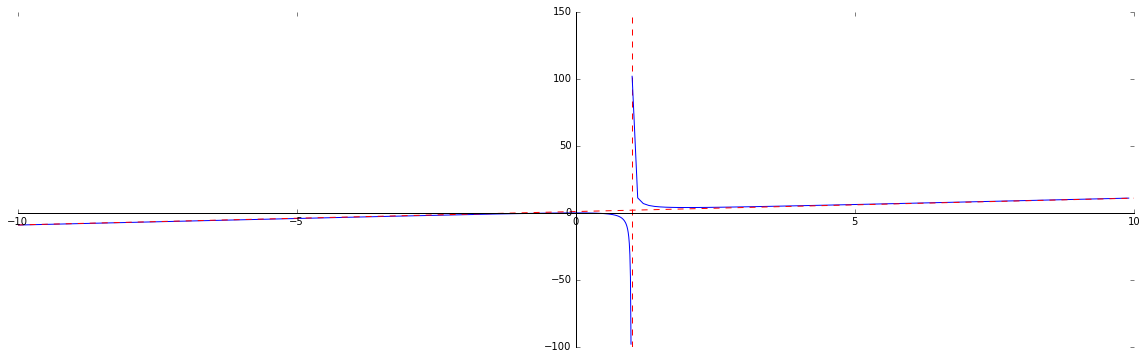

In [32]:
x1 = np.arange(-10., 1., 0.01)
y1 = f(x1)
x2 = np.arange(1.01, 10., 0.1)
y2 = f(x2)
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x1,y1,'b-')
ax.plot(x2,y2,'b-')
ax.plot(np.array([-10, 10]), [-9, 11], 'r--')
ax.vlines(1, -100, 150, linestyles='dashed', color='red');
ax.spines['left'].set_position('zero')
#ax.axis['left'].set_axisline_style('-|>')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
#ax.spines['bottom'].set_axisline_style('-|>')
ax.spines['top'].set_color('none')

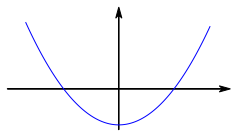

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.arange(-5,5,0.1)
ax.plot(x, x**2-8.8)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis ticks
plt.xticks([]) # labels
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# wider figure for demonstration
fig.set_size_inches(4,2.2)

# get width and height of axes object to compute
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# manual arrowhead width and length
hw = 1./20.*(ymax-ymin)
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang

# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

# draw x and y axis
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw,
         head_width=hw, head_length=hl, overhang = ohg,
         length_includes_head= True, clip_on = False);

ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw,
         head_width=yhw, head_length=yhl, overhang = ohg,
         length_includes_head= True, clip_on = False);